# Particle Swarm Optimization Algorithm (in Python!) 

[SPOILER] We will be using the [Particle Swarm Optimization algorithm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) to obtain the minumum
![PSO-2D](img/PSO_Example1.gif)

First of all, let's import the libraries we'll need (remember we are using Python 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from plotPSO import plotPSO_2D
import optitestfuns

# import scipy as sp
# import time


%matplotlib inline
plt.style.use('bmh')


We can define and plot the function we want to optimize:

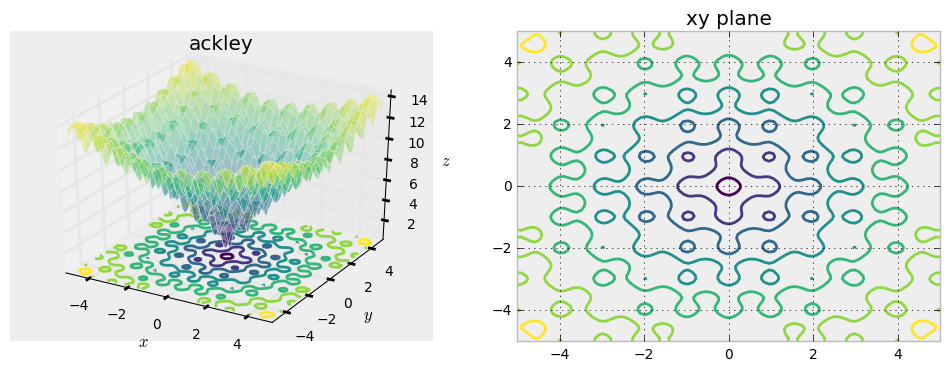

In [2]:
# Testing 2D plot

lo_b = -5  # lower bound
up_b =  5  # upper bound

limits=([lo_b, up_b], # x bounds
        [lo_b, up_b]) # y bounds

x_lo = limits[0][0]
x_up = limits[0][1]
y_lo = limits[1][0]
y_up = limits[1][1]

f = optitestfuns.ackley # Objective function (aka fitness function)

fig, ax = plotPSO_2D(f,  limits)

## PSO Algorithm

In [3]:
n_iterations = 100
    
def run_PSO(n_particles=5, omega=0.1, phi_p=0.1, phi_g=0.1):
    """ PSO algorithm to a funcion already defined.
    Params:
        omega = 0.5  # Particle weight (intertial)
        phi_p = 0.1  # particle best weight
        phi_g = 0.1  # global global weight
    
    """
    global x_best_p_global, y_best_p_global, z_p_best_global, \
           x_particles, y_particles, z_particles, \
           u_particles, v_particles


    # Initialazing x postion of particles
    
    x_particles = np.zeros((n_iterations, n_particles))
    x_particles[0,:] = np.random.uniform(lo_b, up_b, size=n_particles)

    # Initialazing y postion of particles
    y_particles = np.zeros((n_iterations, n_particles))
    y_particles[0,:] = np.random.uniform(lo_b, up_b, size=n_particles)

    # Initialazing best praticles
    x_best_particles = np.copy(x_particles[0,:])
    y_best_particles = np.copy(y_particles[0,:])
    
    # Calculate Objective function (aka fitness function)
    z_particles = np.zeros((n_iterations, n_particles))

    for i in range(n_particles):
        z_particles[0,i] = f((x_particles[0,i],y_particles[0,i]))

    z_best_global = np.min(z_particles[0,:])
    index_best_global = np.argmin(z_particles[0,:])

    x_best_p_global = x_particles[0,index_best_global]
    y_best_p_global = y_particles[0,index_best_global]

    # Initialazin velocity
    velocity_lo = lo_b-up_b  # [L/iteration]
    velocity_up = up_b-lo_b  # [L/iteration] 

    v_max = 0.07 # [L/iteration]

    u_particles = np.zeros((n_iterations, n_particles))
    u_particles[0,:] = 0.1*np.random.uniform(velocity_lo, velocity_up, size=n_particles)

    v_particles = np.zeros((n_iterations, n_particles))
    v_particles[0,:] = 0.1*np.random.uniform(velocity_lo, velocity_up, size=n_particles)

    

    # PSO STARTS
    iteration = 1
    while iteration <= n_iterations-1:
        for i in range(n_particles):
            x_p = x_particles[iteration-1, i]
            y_p = y_particles[iteration-1, i]

            u_p = u_particles[iteration-1, i]
            v_p = v_particles[iteration-1, i]

            x_best_p = x_best_particles[i]
            y_best_p = y_best_particles[i]

            r_p = np.random.uniform(0, 1)
            r_g = np.random.uniform(0, 1)

            u_p_new = omega*u_p + \
                        phi_p*r_p*(x_best_p-x_p) + \
                        phi_g*r_g*(x_best_p_global-x_p)

            v_p_new = omega*v_p + \
                        phi_p*r_p*(y_best_p-y_p) + \
                        phi_g*r_g*(y_best_p_global-y_p)

            # # Velocity control
            # while not (-v_max <= u_p_new <= v_max):  
            #     u_p_new = 0.9*u_p_new 
            # while not (-v_max <= u_p_new <= v_max):  
            #     u_p_new = 0.9*u_p_new 

            x_p_new = x_p + u_p_new
            y_p_new = y_p + v_p_new


            # Ignore new position if it's out of the domain
            if not ((lo_b <= x_p_new <= up_b) and (lo_b <= y_p_new <= up_b)): 
                x_p_new = x_p 
                y_p_new = y_p 

            x_particles[iteration, i] = x_p_new
            y_particles[iteration, i] = y_p_new

            u_particles[iteration, i] = u_p_new
            v_particles[iteration, i] = v_p_new

            # Evaluation            
            z_p_new = f((x_p_new,  y_p_new))
            z_p_best = f((x_best_p, y_best_p))
            
            z_particles[iteration, i] = z_p_new

            if z_p_new < z_p_best:
                x_best_particles[i] = x_p_new
                y_best_particles[i] = y_p_new

                z_p_best_global = f([x_best_p_global, y_best_p_global])

                if z_p_new < z_p_best_global:
                    x_best_p_global = x_p_new
                    y_best_p_global = y_p_new

        # end while loop particles
        iteration = iteration + 1
        
            
    # Plotting convergence
    z_particles_best_hist = np.min(z_particles, axis=1)
    z_particles_worst_hist = np.max(z_particles, axis=1)

    z_best_global = np.min(z_particles)
    index_best_global = np.argmin(z_particles)


    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 2))
    
    # Grid points 
    x_lo = limits[0][0]
    x_up = limits[0][1]
    y_lo = limits[1][0]
    y_up = limits[1][1]
    
    assert x_lo<x_up, "Unbound x limits, the first value of the list needs to be higher"
    assert y_lo<y_up, "Unbound x limits, the first value of the list needs to be higher"
    
    n_points = 100
                                 
    x = np.linspace(x_lo, x_up, n_points) # x coordinates of the grid
    y = np.linspace(y_lo, y_up, n_points) # y coordinates of the grid

    XX, YY = np.meshgrid(x,y)
    ZZ = np.zeros_like(XX)
    
    for i in range(n_points):
        for j in range(n_points):
            ZZ[i,j] = f((XX[i,j], YY[i,j]))
            
    # Limits of the function being plotted   
    ax1.plot((0,n_iterations),(np.min(ZZ),np.min(ZZ)), '--g', label="min$f(x)$")
    ax1.plot((0,n_iterations),(np.max(ZZ),np.max(ZZ)),'--r',  label="max$f(x)$")

    # Convergence of the best particle and worst particle value
    ax1.plot(np.arange(n_iterations),z_particles_best_hist,'b',  label="$p_{best}$")
    ax1.plot(np.arange(n_iterations),z_particles_worst_hist,'k', label="$p_{worst}$")

    ax1.set_xlim((0,n_iterations))

    ax1.set_ylabel('$f(x)$')
    ax1.set_xlabel('$i$ (iteration)')
    ax1.set_title('Convergence')   

    ax1.legend()

2.5305001268980551

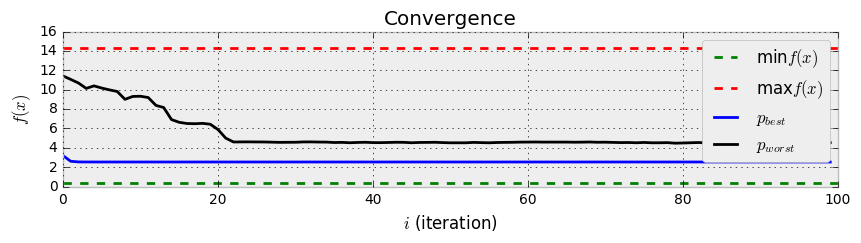

In [4]:
run_PSO()
z_p_best_global

# Animation

In [5]:
from __future__ import print_function
import ipywidgets as widgets
from IPython.display import display, HTML

In [6]:
def plotPSO_iter(i=0): #iteration
    """Visualization of particles and obj. function"""
    
    plotPSO_2D(f, limits,
               particles_xy=(x_particles[i, :],y_particles[i, :]),
               particles_uv=(u_particles[i, :],v_particles[i, :]))        

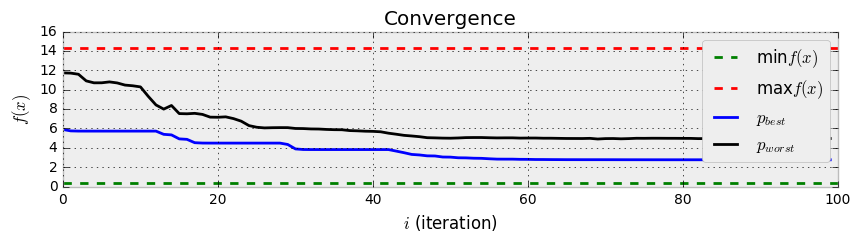

In [7]:
w_arg_PSO = widgets.interact(run_PSO,
                            n_particles=(2,50),
                            omega=(0,1,0.001),
                            phi_p=(0,1,0.001),
                            phi_g=(0,1,0.001))

In [8]:
w_viz_PSO = widgets.interact_manual(plotPSO_iter, i=(0,n_iterations-1))

---

Exporting movie (optional)

In [9]:
# This example uses a MovieWriter directly to grab individual frames and
# write them to a file. This avoids any event loop integration, but has
# the advantage of working with even the Agg backend. This is not recommended
# for use in an interactive setting.
# -*- noplot -*-

# original: http://matplotlib.org/examples/animation/moviewriter.html

#import numpy as np
import matplotlib
#import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title=f.__name__, artist='CAChemE.org',
                comment='PyConES 2016')

writer = FFMpegWriter(fps=10, metadata=metadata)

i = 0 # first values

fig, (ax1, ax2) = plotPSO_2D(f, limits,
                            particles_xy=(x_particles[i, :],y_particles[i, :]),
                           particles_uv=(u_particles[i, :],v_particles[i, :]))  

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n_iterations):
        plotPSO_2D(f, limits,
                   particles_xy=(x_particles[i, :],y_particles[i, :]),
                   particles_uv=(u_particles[i, :],v_particles[i, :]))     

        writer.grab_frame()


RuntimeError: No MovieWriters available!

In [10]:
!PATH

PATH=C:\Users\SERVER\Miniconda3\Library\bin;C:\Users\SERVER\Miniconda3\Library\bin;C:\Users\SERVER\Miniconda3\Library\bin;C:\Windows;C:\Program Files\Common Files\Microsoft Shared\Windows Live;C:\Program Files (x86)\Common Files\Microsoft Shared\Windows Live;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Program Files\MATLAB\R2016a\runtime\win64;C:\Program Files\MATLAB\R2016a\bin;C:\Program Files\MATLAB\R2014a\bin;C:\Program Files (x86)\Windows Live\Shared;C:\Program Files\MATLAB\R2016a\polyspace\bin;C:\Users\SERVER\Miniconda3;C:\Users\SERVER\Miniconda3\Scripts;C:\Users\SERVER\Miniconda3\Library\bin;C:\Program Files\Boot2Docker for Windows;C:\Users\SERVER\AppData\Local\atom\bin
